In [4]:
library("httr")
library("jsonlite")
library("ggplot2")

# Politician Activity on Twitter

The parameters in the cell below can be adjusted to explore other politicians and time frames.

### How to explore other politicians?
The ***politician_id*** is an internal identifier that connects the different social media accounts. You can [use this other notebook](../politicians.ipynb?autorun=true) to get other the identifiers of other politicians.

***Alternatively***, you can direcly use the [politicians API](http://mediamonitoring.gesis.org/api/politicians/swagger/), or access it with the [SMM Wrapper](https://pypi.org/project/smm-wrapper/).

## A. Set Up parameters

search for politician ID

In [17]:
search_term <- "beer"

In [18]:
base <- "http://mediamonitoring.gesis.org/api/politicians/"

url_pol_search <- paste(base,"all/search/?names_contain=",search_term, sep="")

In [19]:
fromJSON(content(GET(url_pol_search), "text", encoding="UTF-8"), flatten = TRUE)

politician_id,name,firstname,affiliation,fb_ids,tw_ids,wp_ids,wp_titles,fb_sns,tw_sns
<int>,<chr>,<chr>,<chr>,<list>,<list>,<list>,<list>,<list>,<list>
184,Beermann,Maik,CDU,3.779472e+14,569257486,7889051,Maik Beermann,"Beermann.Maik , maik.beermann.9",maikbeermann
996,Beer,Nicola Gertrud Ruth,FDP,2.068667e+14,8.28624e+17,2101026,Nicola Beer,"nicola.beer.71, nicolabeerfdp",nicolabeerfdp


In [20]:
# Parameters: 
politician_id = 996
from_date = '2017-09-01'
to_date = '2019-09-31'
aggregation = 'week'

## B. Using the SMM Politician API

In [21]:
#prepare urls
base <- "http://mediamonitoring.gesis.org/api/politicians/"
url_tweets <- paste(base,"twitter/tweets_by/politicians/", politician_id, "/?", sep="")
url_replies <- paste(base,"twitter/replies_to/politicians/", politician_id, "/?", sep="")

#prepare parameters
params = list(
    from_date=from_date,
    to_date=to_date,
    aggregate_by=aggregation
)

# using the api to get the tweets and replies
tweets_by = as.data.frame(fromJSON(content(GET(url_tweets, query=params), "text", encoding="UTF-8"), flatten = TRUE))
replies_to = as.data.frame(fromJSON(content(GET(url_replies, query=params), "text", encoding="UTF-8"), flatten = TRUE))
merged = merge(tweets_by, replies_to, by='labels')

In [22]:
#full_url <- "http://mediamonitoring.gesis.org/api/politicians/twitter/tweets_by/politicians/1928/?from_date=2017-09-01&to_date=2018-12-31&aggregate_by=week"

In [23]:
#replies_to

In [24]:
merged

labels,response_type.x,aggregated_by.x,values.x,response_type.y,aggregated_by.y,values.y
<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
2017-08-28,aggregation,week,50,aggregation,week,56
2017-09-04,aggregation,week,135,aggregation,week,63
2017-09-11,aggregation,week,90,aggregation,week,104
2017-09-18,aggregation,week,96,aggregation,week,85
2017-09-25,aggregation,week,51,aggregation,week,213
2017-10-02,aggregation,week,32,aggregation,week,173
2017-10-09,aggregation,week,72,aggregation,week,109
2017-10-16,aggregation,week,62,aggregation,week,196
2017-10-23,aggregation,week,37,aggregation,week,110


## C. Plotting

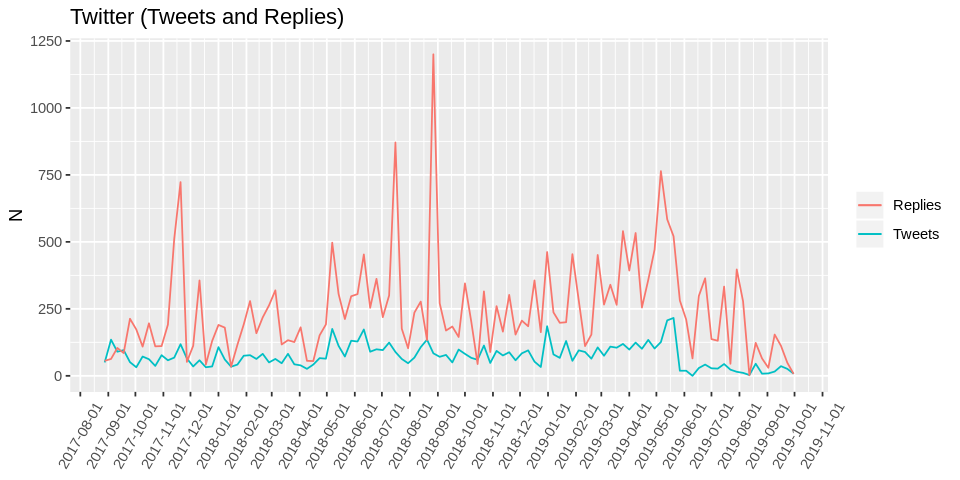

In [25]:

options(repr.plot.width=8, repr.plot.height=4)

# plotting tweets and replies
ggplot(data = merged, mapping = aes(as.Date(labels))) +
  geom_line(aes(y = values.x, color="Tweets")) +
  geom_line(aes(y = values.y, color="Replies")) +
  labs(title = "Twitter (Tweets and Replies)", y = "N") +
  theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
  scale_x_date(date_breaks = "1 month") 

# Vergleich zweier Politikerinnen

In [26]:
params = list(
    from_date='2018-09-01',
    to_date='2019-05-31',
    aggregate_by='month'#,
    #text_contains='Migration'    
)

In [26]:
politician_ids = list('996','1145')#996, 1145

In [27]:
rm(merged,merged2)
for (politician_id in politician_ids){
    url_tweets <- paste(base,"twitter/tweets_by/politicians/", politician_id, "/?", sep="")
    url_replies <- paste(base,"twitter/replies_to/politicians/", politician_id, "/?", sep="")
    tweets_by = as.data.frame(fromJSON(content(GET(url_tweets, query=params), "text", encoding="UTF-8"), flatten = TRUE))
    replies_to = as.data.frame(fromJSON(content(GET(url_replies, query=params), "text", encoding="UTF-8"), flatten = TRUE))
    merged = merge(tweets_by, replies_to, by='labels')
    #add columnname+politician_id as new columnname
    if (exists('merged2')){merged2 = merge(merged, merged2, by='labels')
           } else {merged2 <- merged
                  }   
}


Warning message in rm(merged, merged2):
“object 'merged2' not found”

In [28]:
merged2

labels,response_type.x.x,aggregated_by.x.x,values.x.x,response_type.y.x,aggregated_by.y.x,values.y.x,response_type.x.y,aggregated_by.x.y,values.x.y,response_type.y.y,aggregated_by.y.y,values.y.y
<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
2017-08-28,aggregation,week,9,aggregation,week,78,aggregation,week,50,aggregation,week,56
2017-09-04,aggregation,week,24,aggregation,week,442,aggregation,week,135,aggregation,week,63
2017-09-11,aggregation,week,3,aggregation,week,68,aggregation,week,90,aggregation,week,104
2017-09-18,aggregation,week,12,aggregation,week,106,aggregation,week,96,aggregation,week,85
2017-09-25,aggregation,week,14,aggregation,week,118,aggregation,week,51,aggregation,week,213
2017-10-02,aggregation,week,3,aggregation,week,12,aggregation,week,32,aggregation,week,173
2017-10-09,aggregation,week,8,aggregation,week,34,aggregation,week,72,aggregation,week,109
2017-10-16,aggregation,week,1,aggregation,week,10,aggregation,week,62,aggregation,week,196
2017-10-23,aggregation,week,9,aggregation,week,40,aggregation,week,37,aggregation,week,110


In [ ]:
merged2

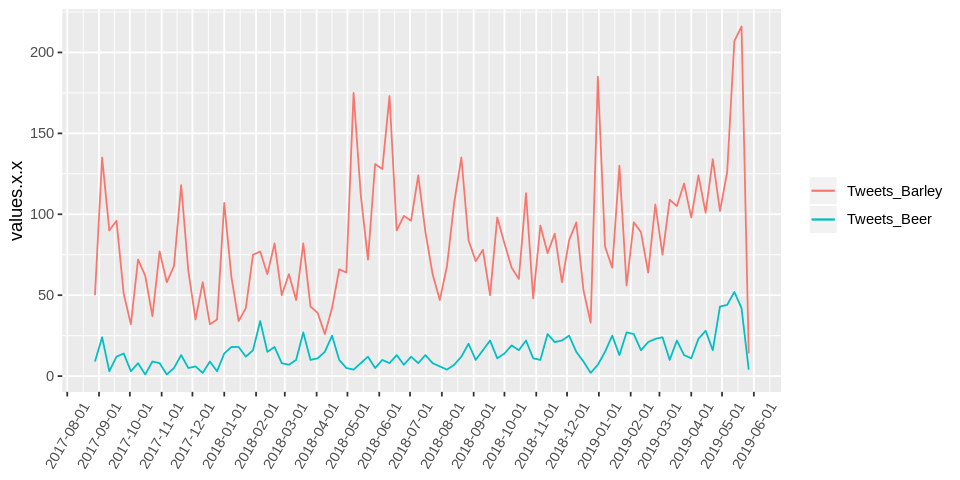

In [13]:
library("ggplot2")
options(repr.plot.width=8, repr.plot.height=4)

# plotting tweets 
ggplot(data = merged2, mapping = aes(as.Date(labels))) +
  geom_line(aes(y = values.x.x, color="Tweets_Beer")) +
  geom_line(aes(y = values.x.y, color="Tweets_Barley")) +
  
  theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
  scale_x_date(date_breaks = "1 month") 

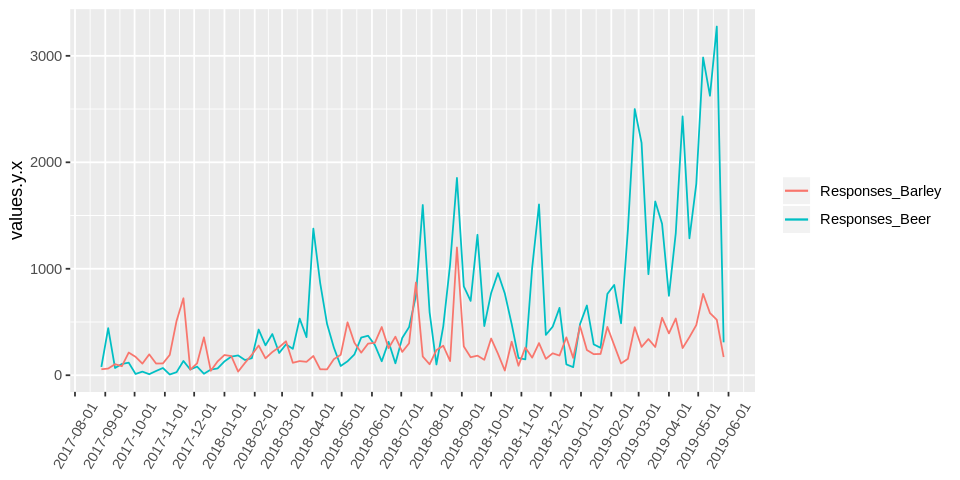

In [14]:

options(repr.plot.width=8, repr.plot.height=4)

# plotting responses 
ggplot(data = merged2, mapping = aes(as.Date(labels))) +
  geom_line(aes(y = values.y.x, color="Responses_Beer")) +
  geom_line(aes(y = values.y.y, color="Responses_Barley")) +
  
  theme(axis.text.x = element_text( angle = 60, hjust = 0.5, vjust = 0.5),
        axis.title.x = element_blank(), legend.title = element_blank()) +
  scale_x_date(date_breaks = "1 month") 

# Und nun nur mit Tweets über Thema X